In [1]:
import main as main

In [2]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from db import dbctrl as dbc
import string
from wordcloud import WordCloud
import re

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd

In [4]:
main.run_all()

'Program has sucessfully scraped and saved the data.'

### San Francisco

In [22]:
def cbs_kpix_scraper():
    # San Francisco, CA
    cbs_kpix_sf = urlopen('https://sanfrancisco.cbslocal.com/category/news/')
    cbs_kpix_soup = BeautifulSoup(cbs_kpix_sf, 'html.parser')
    titles = cbs_kpix_soup.find_all('strong', class_='title')

    articles = []

    for title in titles:
        check = title.text.split(' ')
        if len(check) > 4:
            articles.append(title.text)
            
    articles = list(set(articles))
        
    return articles

In [35]:
def the_sfnews_scraper():
    # San Francisco, CA
    the_sfnews = urlopen('https://www.thesfnews.com/')
    the_sfnews_soup = BeautifulSoup(the_sfnews, 'html.parser')
    titles = the_sfnews_soup.find_all('a', class_='td-image-wrap')

    articles = []

    for title in titles:
        articles.append(title['title'])
    
    articles = list(set(articles))
    
    return articles

### San Diego

In [11]:
def kswb_fox_5_scraper():
    ### San Diego, CA
    kswb_fox_5_sd = urlopen('https://fox5sandiego.com/')
    kswb_fox_5_soup = BeautifulSoup(kswb_fox_5_sd, 'html.parser')
    titles = kswb_fox_5_soup.find_all('h3', class_='article-list__article-title')

    articles = []

    for title in titles:
        if len(title) > 2:
            articles.append(title.text.rstrip().lstrip())
    
    articles = list(set(articles))   
    
    return articles

In [13]:
def nbc7_san_diego_scraper():
    ### San Diego, CA
    nbc7_san_diego = urlopen('https://www.nbcsandiego.com/news/local/')
    nbc7_san_diego_soup = BeautifulSoup(nbc7_san_diego, 'html.parser') 
    titles = nbc7_san_diego_soup.find_all('h3', class_='story-card__title')

    articles = []

    for title in titles:
        print(title.text.rstrip().lstrip())
        
    articles = list(set(articles))   
    
    return articles

Latest Coronavirus Impacts:  Stay-Home Order, Curfew Lifted; Some Sports, Live Entertainment Return
CVFD Battling Building Fire
Heavy Snow, Hail and High Winds: Winter Storm Blows Through San Diego
Will A UV Light Device Kill Coronavirus?
Grandmother Dies Battling COVID-19, Daughter Vows to Raise Awareness In Her Memory
California Measure Aims to Pay Off 80% of Most Unpaid Rent
Winter Weather Batters County as Restaurants Prep for Return of Outdoor Dining
Photos: Winter Storm Batters San Diego County With Trifecta of Snow, Wind and Rain
Legion to Call Vegas Home for 2021 MLR Season
Gulls Roster Flush With Top Prospects
San Diego Zoo Safari Park Gorilla Troop Recovering From COVID-19
SD Humane Society Begins Wildlife Baby Shower To Help Animals This Spring
San Diego Family's Warning as COVID-19 Deaths Continue Rising
Search Warrant Served at Home of Missing Chula Vista Mom
Study Suggests Those With Severe COVID-19 Symptoms Have Better Chance of Fighting Reinfection
Sign Language Interpr

In [5]:
def kusi_scraper():
    ### San Diego, CA
    kusi = urlopen('https://www.kusi.com/local-san-diego-news/')
    kusi_soup = BeautifulSoup(kusi, 'html.parser')
    titles = kusi_soup.find_all('h3', class_='entry-title')

    articles = []

    for title in titles:
        print(title.text)
        
    articles = list(set(articles))
    
    return articles

SDUT op-ed details Port of San Diego's efforts to attract new maritime investments
San Diego City Council extends shelter operation at convention center
More than $90k in scholarships available for San Diego & Riverside County students
San Diego County Supervisors overturn ban on needle exchange program
Senator partners with San Diego DA on legislation to keep SVP hearings public
Coach Jason Carter wants to see action from our government to resume sports
California to take more control over slow vaccine delivery
FBI requests public assistance to identify Scripps Ranch bank robber
Rock N Hair Salon excited and relieved to be able to rebuild their business
Owner of The DOT Cocktail Lounge says our government is leaving small businesses behind
Coach Gardinera gives an update on resuming youth sports in CA
San Diego Area can expect calmer conditions between storms
San Diego Council to vote on eviction moratorium Tuesday
Mayor Gloria signs executive action capping third-party food delivery 

In [8]:
def cbs8_sd_scaper():
    ###CBS 8 - San Diego
    cbs8 = urlopen('https://www.cbs8.com/')
    cbs8_soup = BeautifulSoup(cbs8, 'html.parser')
    titles = cbs8_soup.find_all('a', class_='headline-list__title')

    articles = []

    for title in titles:
        articles.append(title.text)
    
    articles = list(set(articles))

    return articles

["What you need to know about California's new age-based vaccination system", 'San Diego business owners scramble to reopen after governor lifts stay-at-home order', 'CA Gov. Newsom criticized for timing with lifting stay-at-home order', 'Sen. Patrick Leahy, Trump trial presiding officer, back home after hospital visit', 'San Diego City Council extends eviction moratorium for tenants, small businesses', 'Baseball Hall of Fame elects no players for Class of 2021', 'Smaller investors face down hedge funds, as GameStop soars', 'Biden calls for end to federal use of private prisons', 'Imperial County grapples with limited COVID-19 vaccine supply', 'Senate Republicans largely vote against holding Trump impeachment trial', 'San Diego City Council extends Shelter Operation at Convention Center', 'Hit-and-run driver injures Fallbrook animal shelter volunteer, kills rescue dog', 'Biden administration to boost COVID-19 vaccine supply amid shortages']


## Portland

In [12]:
oregonlive = urlopen('https://www.oregonlive.com/portland/')
oregonlive_soup = BeautifulSoup(oregonlive, 'html.parser')
titles = oregonlive_soup.find_all('article', class_='two-box-item')

articles = []

for title in titles:
    print(title.text)

Thousands of Portland-area health care workers may have to wait months for COVID-19 vaccineThousands of Portland-area health care workers may have to wait months for COVID-19 vaccine28m agoAndrew Theen | The Oregonian/OregonLive
Subscriber ExclusiveKeyKey that denotes Subscriber Exclusive content.Police chief proposes recreating uniformed patrol team to work with on-call investigators to stem Portland’s gun violencePolice chief proposes recreating uniformed patrol team to work with on-call investigators to stem Portland’s gun violence1h agoMaxine Bernstein | The Oregonian/OregonLive


### Data

In [5]:
titles = dbc.grab_titles()

In [6]:
titles = [re.sub("\dh$", '', i) for i in titles]

In [7]:
stop_words = set(stopwords.words('english')) | set(string.punctuation)

In [8]:
cleaned_titles = []
for i in titles:
    word_tokens = word_tokenize(i)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
            
    cleaned_titles.append(filtered_sentence)

In [9]:
cleaned_words = []
for titles in cleaned_titles:
    for words in titles:
        cleaned_words.append(re.sub(r'\dh','', words))

In [10]:
listToStr = ' '.join([str(elem) for elem in cleaned_words])

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(listToStr)

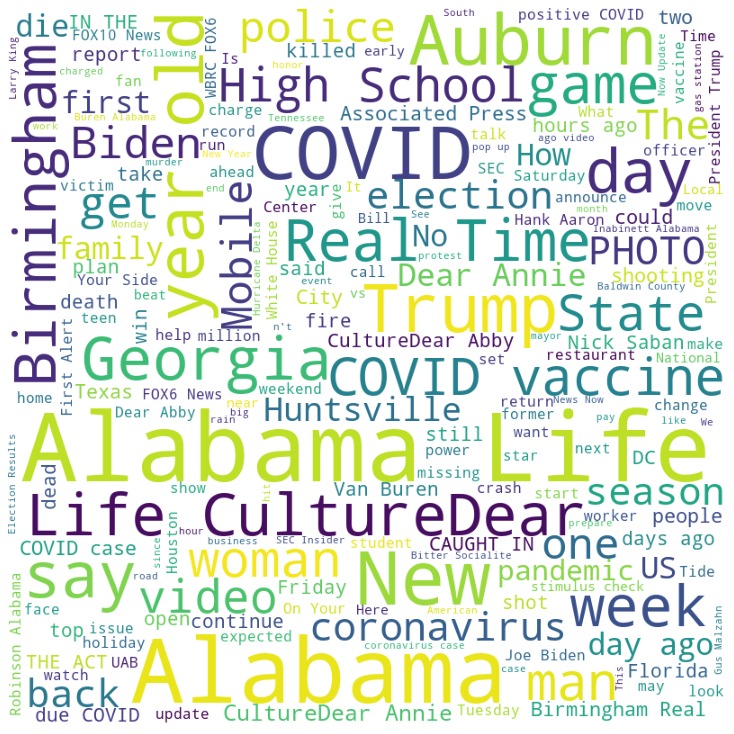

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize = (20, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
plt.savefig('wordcloud')

In [17]:
# wordcloud.to_file('alabama_wordcloud.png')

### Observing the Data that we have collected

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [28]:
no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(cleaned_words)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
life vaccine time 2020 coronavirus georgia high 10 death positive
Topic 1:
ago man election video news real days culturedear dies capitol
Topic 2:
alabama says state football national tuscaloosa texas watch atlanta help
Topic 3:
county inauguration shooting dc hank update van buren monday vaccines
Topic 4:
covid 19 police killed president game season abby houston arrested
Topic 5:
birmingham home photos pandemic mobile king say stimulus joe senate
Topic 6:
year old health robinson shot huntsville charged inabinett live coach
Topic 7:
biden day woman annie 2021 house associated harris dead world
Topic 8:
new trump auburn school people aaron head officials flanagan wbrc
Topic 9:
week cases 000 hours missing family officer area years vote


### EDA

In [14]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabrielarnold/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = cleaned_titles
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['alabama', 'adds', 'confirmed', 'coronavirus', 'casesthe', 'daily', 'update', 'coronavirus', 'cases', 'alabama']


In [16]:
# Create Dictionary
import gensim.corpora as corpora
# Create Corpus
id2word = corpora.Dictionary(data_words)
# Term Document Frequency
texts = data_words
# View
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1)]


In [17]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"covid" + 0.010*"biden" + 0.009*"new" + 0.009*"alabama" + 0.008*"ago" '
  '+ 0.007*"day" + 0.006*"says" + 0.006*"year" + 0.005*"man" + 0.005*"auburn"'),
 (1,
  '0.014*"alabama" + 0.008*"covid" + 0.007*"life" + 0.006*"day" + 0.006*"ago" '
  '+ 0.005*"new" + 0.005*"biden" + 0.005*"auburn" + 0.005*"biscuit" + '
  '0.005*"vaccines"'),
 (2,
  '0.016*"alabama" + 0.014*"covid" + 0.012*"first" + 0.008*"biden" + '
  '0.006*"county" + 0.006*"police" + 0.005*"vaccine" + 0.004*"plan" + '
  '0.004*"new" + 0.004*"auburn"'),
 (3,
  '0.016*"alabama" + 0.011*"covid" + 0.009*"aaron" + 0.009*"hank" + '
  '0.008*"life" + 0.006*"news" + 0.006*"home" + 0.005*"police" + 0.005*"year" '
  '+ 0.005*"atlanta"'),
 (4,
  '0.013*"covid" + 0.009*"alabama" + 0.007*"time" + 0.007*"county" + '
  '0.007*"birmingham" + 0.007*"ago" + 0.007*"vaccine" + 0.006*"real" + '
  '0.006*"trump" + 0.005*"high"'),
 (5,
  '0.023*"alabama" + 0.014*"county" + 0.014*"covid" + 0.007*"vaccine" + '
  '0.005*"year" + 0.005*"cas

In [21]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.083229  0.046126       1        1  11.811386
5     -0.033398 -0.011000       2        1  10.606033
4      0.090681  0.020985       3        1  10.598955
0      0.079200 -0.038029       4        1  10.091911
2     -0.006859 -0.053033       5        1   9.980518
3     -0.024095  0.113175       6        1   9.948083
7     -0.008527 -0.128635       7        1   9.657633
1     -0.091521 -0.006688       8        1   9.198919
9      0.008903  0.029390       9        1   9.130564
8     -0.097613  0.027709      10        1   8.975997, topic_info=        Term        Freq       Total Category  logprob  loglift
333    first  153.000000  153.000000  Default  30.0000  30.0000
8431   aaron  133.000000  133.000000  Default  29.0000  29.0000
8432    hank  130.000000  130.000000  Default  28.0000  28.0000
8509  braves   37.000000   37.000000  Default  27.0000  27.0000
29     trump  240.000000  240.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
129   county   22.517161  322.119679  Topic10  -5.4523  -0.2500
29     trump   20.015485  240.738192  Topic10  -5.5701  -0.0766
431      new   18.221338  219.873286  Topic10  -5.6640  -0.0798
367      man   18.206320  239.143979  Topic10  -5.6649  -0.1647
43    auburn   15.823876  190.423882  Topic10  -5.8051  -0.0771

[817 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8431      1  0.037430   aaron
8431      2  0.022458   aaron
8431      3  0.022458   aaron
8431      4  0.059888   aaron
8431      5  0.067374   aaron
...     ...       ...     ...
1195      9  0.105439   years
1195     10  0.225941   years
8236      4  0.870200  yellen
8236      8  0.145033  yellen
7374     10  0.876377     yes

[2346 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 5, 1, 3, 4, 8, 2, 10, 9])